# Exploratory & Statistical Analysis

In [19]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("marketing_campaign.csv", sep="\t")
print(df.columns.tolist())


['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


## Segment customers by age, income, education, or family status


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Calculate Age
df['Age'] = 2025 - df['Year_Birth']

# Calculate Family Size
df['Family_Size'] = df['Kidhome'] + df['Teenhome']

# Age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=["18-30", "31-45", "46-60", "61-80"])

# Income groups
df['Income_Group'] = pd.qcut(df['Income'], q=4, labels=["Low", "Medium", "High", "Very High"])

# Total Spend
df["Total_Spend"] = df[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]].sum(axis=1)

# Total campaigns accepted
campaign_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
df["Total_Accepted_Campaigns"] = df[campaign_cols].sum(axis=1)


## spending patterns and campaign response by segment

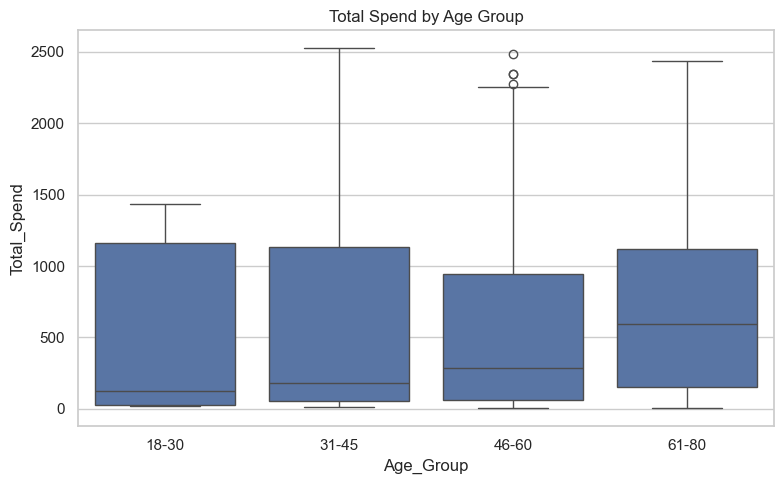

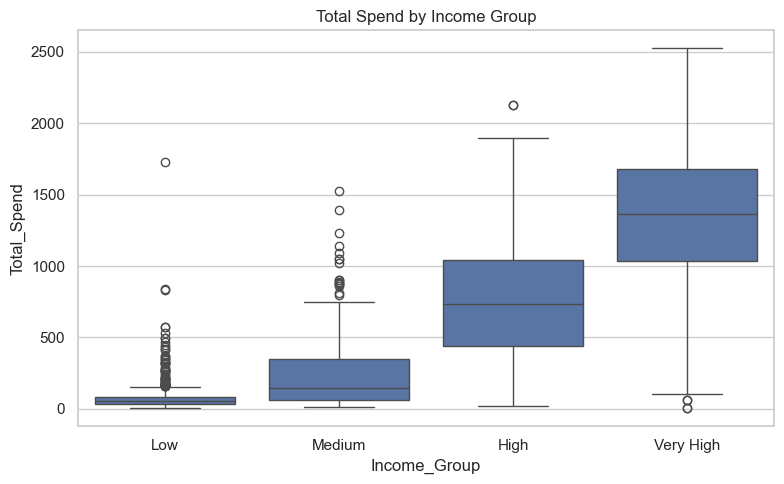

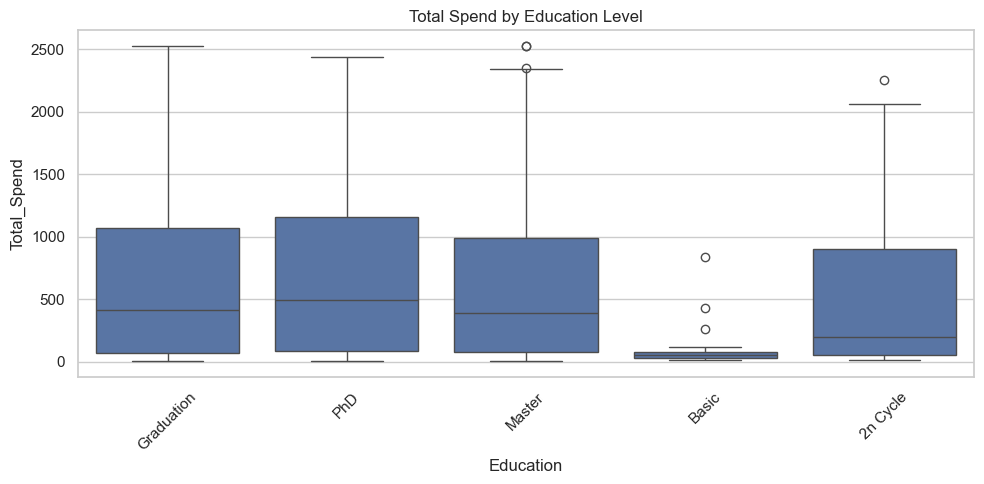

In [9]:
sns.set(style="whitegrid")

# By Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(x="Age_Group", y="Total_Spend", data=df)
plt.title("Total Spend by Age Group")
plt.tight_layout()
plt.show()

# By Income Group
plt.figure(figsize=(8, 5))
sns.boxplot(x="Income_Group", y="Total_Spend", data=df)
plt.title("Total Spend by Income Group")
plt.tight_layout()
plt.show()

# By Education
plt.figure(figsize=(10, 5))
sns.boxplot(x="Education", y="Total_Spend", data=df)
plt.title("Total Spend by Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## campaign effectiveness (conversion rates by group)

C:\Users\mdath\AppData\Local\Temp\ipykernel_20004\249244750.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_age = df.groupby("Age_Group")["Total_Accepted_Campaigns"].mean()


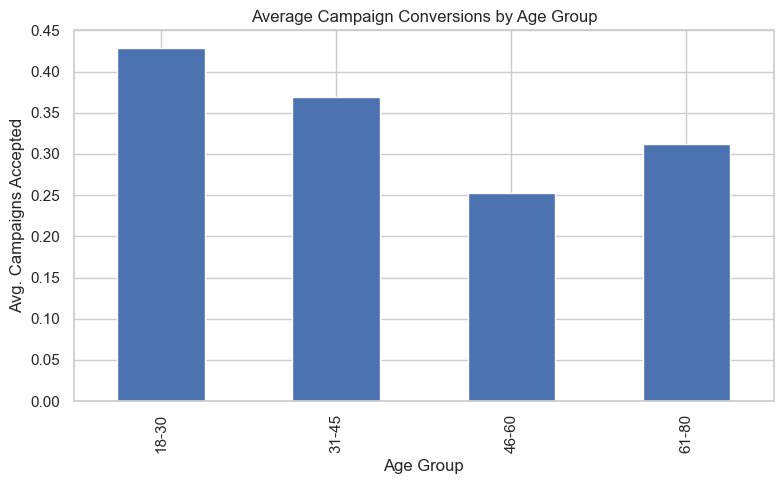

In [11]:
# Average conversions by Age Group
conversion_by_age = df.groupby("Age_Group")["Total_Accepted_Campaigns"].mean()

conversion_by_age.plot(kind="bar", figsize=(8, 5),
                       title="Average Campaign Conversions by Age Group",
                       ylabel="Avg. Campaigns Accepted",
                       xlabel="Age Group")
plt.tight_layout()
plt.show()


## correlations between marketing attributes and conversion

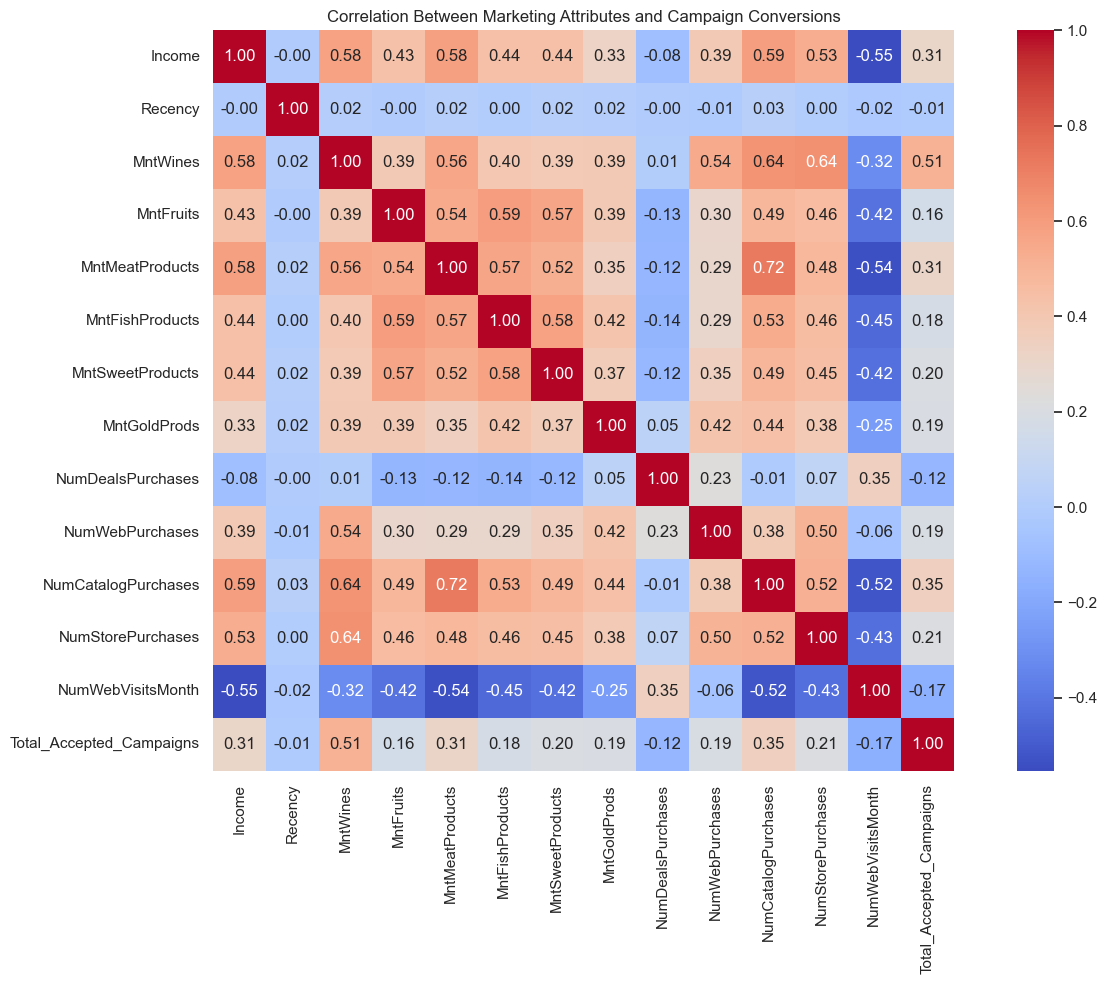

In [13]:
corr_columns = [
    "Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth", "Total_Accepted_Campaigns"
]

corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Between Marketing Attributes and Campaign Conversions")
plt.tight_layout()
plt.show()
